In [11]:
import seaborn as sns
import pandas as pd 
import numpy as np 

# 1 First EDA
To get a first overview of the dataset


In [12]:
# path
file_path = 'netflixdata.csv'
# Read csv as df
data = pd.read_csv(file_path)


In [13]:
data.head()


,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [ ]:
data.info()

In [ ]:
data.describe()
#no implausible outliers detected

In [ ]:
data.isnull().sum()

In [ ]:
print(data.columns)

In [ ]:
for x in data.columns:
    print(data[x].unique())

# Top Analysis

In [ ]:
# 3 best movies
top_3_movies_and_shows = data.sort_values(by='imdb_score', ascending=False).head(3)

# longest 
longest_movie = data[data['type'] == 'MOVIE'].sort_values(by='runtime', ascending=False).head(1)

# shortest
shortest_movie = data[data['type'] == 'MOVIE'].sort_values(by='runtime', ascending=True).head(1)

# results
#print("Top 3 movies:\n", top_3_movies_and_shows[["title", "imdb_score"]])
top_3_movies_and_shows.head()
#print("\nLongest movie:\n", longest_movie[['title', 'runtime']])
#print("\nShortest movie:\n", shortest_movie[['title', 'runtime']])


# 2 Data Processing
Transform data into a cleaner organized format if necessary

There is only one column with empty values

In [ ]:
null_column = data['age_certification']
print(null_column)

Outlier Detection
No need for that since there were no implausible values detected using the describe function

Data Transformation
Changing the data in more processable format

In [ ]:
data_cat = data['age_certification'].unique()
print(data_cat)

In [ ]:
#adding a mapping table with age describtion:
age_certification_years = {
    'R': 18,          
    'PG': 8,      
    'TV-14': 14,   
    'G': 0,          
    'PG-13': 13,    
    'TV-MA': 18,     
    'TV-PG': 8,      
    'TV-Y': 0,       
    'TV-G': 0,      
    'TV-Y7': 7,      
    'NC-17': 18      
}


In [ ]:
#geneate a mapping datafram
age_certification_mapping = pd.DataFrame(list(age_certification_years.items()), columns=['age_certification', 'minimum_age'])


In [ ]:
# merge the dataframe with the existing dataframe
data_exp = data.merge(age_certification_mapping, on='age_certification', how='left')

In [ ]:
data_exp.head()

In [ ]:
data = data_exp
data.head()

Binning the data to 

In [ ]:
# Define bins and labels
bins = [0, 7, 13, 16, 18]  # You can adjust these based on your specific requirements
labels = ['All', 'Children', 'Teenager', 'Adults']

#create new column
data['minimum_age_Binned'] = pd.cut(data['minimum_age'], bins=bins, labels=labels, right=True)

data[['minimum_age_Binned','minimum_age']]

In [ ]:
data.head()

# 3 Data Exploration


1. Measaures of Central Tendency

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import tkinter
#tkinter._test()

In [ ]:
import matplotlib
matplotlib.use('TkAgg')  # looked up at stackoverflow
import matplotlib.pyplot as plt


In [ ]:
# Mean for eliable columns with numeric values
data[['runtime', 'imdb_score', 'imdb_votes']].mean()

In [ ]:
# Median for eliable columns with numeric values
data[['runtime', 'imdb_score', 'imdb_votes']].median()

In [ ]:
# Mode for eliable columns with numeric values
data[['release_year', 'imdb_score', 'imdb_votes', 'runtime', 'minimum_age_Binned']].mode()

2. Measure of Dispersion & Frequency

In [ ]:
# Range
year_range = data['release_year'].max() - data['release_year'].min()
print('Years: max:', data['release_year'].max(), ', min:', data['release_year'].min(), ' , range:', year_range)

rating_range = data['imdb_score'].max() - data['imdb_score'].min()
print('IMBD-Score: max:', data['imdb_score'].max(), ', min:', data['imdb_score'].min(), ' , range:', rating_range)

runtime_range = data['runtime'].max() - data['runtime'].min()
print('Runtimes: max:', data['runtime'].max(), ', min:', data['runtime'].min(), ' , range:', runtime_range)

In [ ]:
# Standard Deviation for eliable columns with numeric values
data[['runtime', 'imdb_score', 'imdb_votes']].std()

In [ ]:
# Quartile

Q1 = data[['runtime', 'imdb_score','imdb_votes']].quantile(0.25)
Q2 = data[['runtime', 'imdb_score','imdb_votes']].quantile(0.5)
Q3 = data[['runtime', 'imdb_score','imdb_votes']].quantile(0.75)
IQR = Q3 -Q1

pd.DataFrame({'Q1': Q1, 'Q2': Q2, 'Q3': Q3, 'IQR': IQR}).T

In [ ]:
#Boxplots
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(11, 8))
colors = ['#2E4E4E', '#6DB6B6']
for i, col in enumerate(['runtime', 'imdb_score']):
    boxplot = axes[i].boxplot(data[col], patch_artist=True)
    
    for patch in boxplot['boxes']:
        patch.set_facecolor(colors[i])
    stats = np.percentile(data[col], [25, 50, 75])  # Quartile
    min_value = data[col].min()
    max_value = data[col].max()
    
    axes[i].annotate(f'Min: {min_value}', xy=(1, min_value), xytext=(25, 2),
                     textcoords='offset points', va='top')
    axes[i].annotate(f'Max: {max_value}', xy=(1, max_value), xytext=(25, 0),
                     textcoords='offset points', va='center')
    axes[i].annotate(f'Median: {stats[1]}', xy=(1, stats[1]), xytext=(60, 0),
                     textcoords='offset points', va='center')
    axes[i].annotate(f'1st Quartile: {stats[0]}', xy=(1, stats[0]), xytext=(60, 0),
                     textcoords='offset points', va='center')
    axes[i].annotate(f'3rd Quartile: {stats[2]}', xy=(1, stats[2]), xytext=(60, 0),
                     textcoords='offset points', va='center')
    
    axes[i].set_title(col, fontsize=16)
    axes[i].set_ylabel(col, fontsize=14)
    axes[i].tick_params(axis='y', labelsize=12)
        
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame and it has already been loaded.
# Filter data for Movies based on the 'type' column
data_movies = data[data['type'] == 'MOVIE']

# Create boxplots for each feature for Movies
fig, axes = plt.subplots(1, 2, figsize=(11, 8))  # Adjusted to a 1x2 grid
colors = ['#2E4E4E', '#6DB6B6']

# Creating boxplots for Movies
for i, col in enumerate(['runtime', 'imdb_score']):
    # Using dropna() to remove NaN values
    boxplot = axes[i].boxplot(data_movies[col].dropna(), patch_artist=True, boxprops=dict(facecolor=colors[i]))

    # Extract statistics for annotation
    stats = np.percentile(data_movies[col].dropna(), [25, 50, 75])  # Quartiles
    min_value = data_movies[col].min()
    max_value = data_movies[col].max()
    
    # Annotate the boxplot with these statistics
    axes[i].annotate(f'Min: {min_value}', xy=(1, min_value), xytext=(25, 2),
                     textcoords='offset points', va='top')
    axes[i].annotate(f'Max: {max_value}', xy=(1, max_value), xytext=(25, 0),
                     textcoords='offset points', va='center')
    axes[i].annotate(f'Median: {stats[1]}', xy=(1, stats[1]), xytext=(60, 0),
                     textcoords='offset points', va='center')
    axes[i].annotate(f'1st Quartile: {stats[0]}', xy=(1, stats[0]), xytext=(60, 0),
                     textcoords='offset points', va='center')
    axes[i].annotate(f'3rd Quartile: {stats[2]}', xy=(1, stats[2]), xytext=(60, 0),
                     textcoords='offset points', va='center')

    # Set titles and labels
    axes[i].set_title(f'Movies {col}', fontsize=16)
    axes[i].set_ylabel(col, fontsize=14)
    axes[i].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'data' is your DataFrame and it has been loaded previously.

# Filter data for Movies and Shows based on the 'type' column
data_movies = data[data['type'] == 'MOVIE']
data_shows = data[data['type'] == 'SHOW']

# Create boxplots for Movies and Shows
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns
colors = ['#2E4E4E', '#6DB6B6']  # Colors for columns

# Creating boxplots for each category and each feature
for i, col in enumerate(['runtime', 'imdb_score']):
    # Boxplot for Movies
    bp_movies = axes[i].boxplot(data_movies[col].dropna(), positions=[1], patch_artist=True, boxprops=dict(facecolor=colors[i]))
    # Boxplot for Shows
    bp_shows = axes[i].boxplot(data_shows[col].dropna(), positions=[2], patch_artist=True, boxprops=dict(facecolor=colors[i]))
    
    axes[i].set_title(f'{col.title()} Distribution')
    axes[i].set_xticks([1, 2])
    axes[i].set_xticklabels(['Movies', 'Shows'])

    # Annotate the Movies and Shows with their median, Q1, Q3, min, and max values
    # Movies
    median_movies = np.median(data_movies[col].dropna())
    q1_movies = np.percentile(data_movies[col].dropna(), 25)
    q3_movies = np.percentile(data_movies[col].dropna(), 75)
    min_movies = np.min(data_movies[col].dropna())
    max_movies = np.max(data_movies[col].dropna())
    # Shows
    median_shows = np.median(data_shows[col].dropna())
    q1_shows = np.percentile(data_shows[col].dropna(), 25)
    q3_shows = np.percentile(data_shows[col].dropna(), 75)
    min_shows = np.min(data_shows[col].dropna())
    max_shows = np.max(data_shows[col].dropna())

 # Add data annotations for median, Q1, Q3, min, and max for Movies and Shows
    # Movies Annotations
    axes[i].annotate(f'Median: {median_movies}', xy=(1, median_movies), xytext=(60, 0), textcoords='offset points', ha='center', va='bottom')
    axes[i].annotate(f'1st Quartile: {q1_movies}', xy=(1, q1_movies), xytext=(70,0), textcoords='offset points', ha='center', va='bottom')
    axes[i].annotate(f'3rd Quartile: {q3_movies}', xy=(1, q3_movies), xytext=(70, 0), textcoords='offset points', ha='center', va='bottom')
    axes[i].annotate(f'Min: {min_movies}', xy=(1, min_movies), xytext=(25, 0), textcoords='offset points', ha='center', va='bottom')
    axes[i].annotate(f'Max: {max_movies}', xy=(1, max_movies), xytext=(25, 0), textcoords='offset points', ha='center', va='bottom')

    # Shows Annotations
    axes[i].annotate(f'Median: {median_shows}', xy=(2, median_shows), xytext=(60, 0), textcoords='offset points', ha='center', va='bottom')
    axes[i].annotate(f'1st Quartile: {q1_shows}', xy=(2, q1_shows), xytext=(70, 0), textcoords='offset points', ha='center', va='bottom')
    axes[i].annotate(f'3rd Quartile: {q3_shows}', xy=(2, q3_shows), xytext=(70, 0), textcoords='offset points', ha='center', va='bottom')
    axes[i].annotate(f'Min: {min_shows}', xy=(2, min_shows), xytext=(25, 0), textcoords='offset points', ha='center', va='bottom')
    axes[i].annotate(f'Max: {max_shows}', xy=(2, max_shows), xytext=(25, 0), textcoords='offset points', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
print(data['imdb_votes'].isnull().sum())
print(data['imdb_votes'].dtype)
data['imdb_votes'].describe()


In [ ]:
# frequency
frequency_table = data['minimum_age_Binned'].value_counts().reset_index()
frequency_table.columns = ['ageclass', 'Frequency']

frequency_table

Visually explore Distribution


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["figure.figsize"] = (4.5, 3.5)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Annahme: Daten sind im DataFrame 'data' geladen
runtime_data = data["runtime"]
n = len(runtime_data)
std_dev = np.std(runtime_data, ddof=0)
IQR = np.percentile(runtime_data, 75) - np.percentile(runtime_data, 25)

# Berechnung der Bins
bins_dict = {
    "Square Root": int(np.sqrt(n)),
    "Sturges": int(1 + 3.322 * np.log10(n)),
    "Rice": int(2 * n ** (1/3)),
    "Scott": int((max(runtime_data) - min(runtime_data)) / (3.5 * std_dev / n ** (1/3))),
    "Freedman-Diaconis": int((max(runtime_data) - min(runtime_data)) / (2 * IQR / n ** (1/3)))
}

# Erstellen der Subplots mit A4-Abmessungen
fig, axes = plt.subplots(3, 2, figsize=(11.69, 8.27))  # 3 Reihen, 2 Spalten

# Schriftgrößen
title_fontsize = 5
label_fontsize = 3
ticks_fontsize = 3

# Histogramme plotten
for i, (title, bins) in enumerate(bins_dict.items()):
    row = i // 2  # Bestimmen der Reihe
    col = i % 2   # Bestimmen der Spalte

    ax = axes[row, col]
    ax.hist(runtime_data, bins=bins, edgecolor='white', color="#2E4E4E", alpha=0.99)
    ax.set_title(f"{title}: {bins} bins", fontsize=title_fontsize)
    ax.set_xlabel("Runtime", fontsize=label_fontsize)
    ax.set_ylabel("Frequency", fontsize=label_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=ticks_fontsize)

# Verstecken des letzten (leeren) Subplots
fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()

In [ ]:
sns.kdeplot(runtime_data, fill=True, color="#2E4E4E")
plt.show()

In [ ]:
sns.histplot(runtime_data, bins=34, edgecolor='white', kde=True, color="#2E4E4E")
plt.show()

In [ ]:
#IMDB-Data Distrubution
imdb_score_data = data["imdb_score"]
print(imdb_score_data)
n = len(imdb_score_data)
std_dev = np.std(imdb_score_data, ddof=0)  
IQR = np.percentile(imdb_score_data, 75) - np.percentile(imdb_score_data, 25)

# Calculate bins for different bin counts
bins_dict_imdb = {
    "Square Root": int(np.sqrt(n)),
    "Sturges": int(1 + 3.322 * np.log10(n)),
    "Rice": int(2 * n ** (1/3)),
    "Scott": int((max(imdb_score_data) - min(imdb_score_data)) / (3.5 * std_dev / n ** (1/3))),
    "Freedman-Diaconis": int((max(imdb_score_data) - min(imdb_score_data)) / (2 * IQR / n ** (1/3)))
}

# Create the subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# Plot histograms
for i, (title, bins) in enumerate(bins_dict_imdb.items()):
    axes[i].hist(imdb_score_data, bins=bins, edgecolor='white', color="#FB967F", alpha=0.7)
    axes[i].set_title(f"{title}: {bins} bins")

plt.show()

In [ ]:
sns.kdeplot(data['imdb_score'], fill=True, color="#E1874C")
plt.show()

In [ ]:

sns.histplot(imdb_score_data, bins=34, kde=True, edgecolor="white", color="#3C70FF")
plt.show()



In [ ]:
# Distribution Fitting
from scipy.stats import norm

# Create original plot
sns.histplot(imdb_score_data, bins=19, kde=True,  edgecolor='white', stat="density", color='#FF9502')

# Set range of plot
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# Fit a normal distribution to the data
mu, std = norm.fit(imdb_score_data)
p_norm = norm.pdf(x, mu, std)
plt.plot(x, p_norm, 'k--', linewidth=3, alpha=0.7)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, mode
import numpy as np

sns.histplot(imdb_score_data, bins=19, kde=True, edgecolor='white', stat="density", color='#6DB6B6')

# Fit a normal distribution to the data
mu, std = norm.fit(imdb_score_data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p_norm = norm.pdf(x, mu, std)
plt.plot(x, p_norm, 'k--', linewidth=3, alpha=0.7)

# Calculate mean, median, and mode
mean = np.mean(imdb_score_data)
median = np.median(imdb_score_data)
mod = mode(imdb_score_data)[0][0]  # Mode might return multiple values; take the first one

# Add vertical lines for mean, median, and mode
plt.axvline(mean, color='red', linestyle='-', linewidth=1, label='Mean')
plt.axvline(median, color='blue', linestyle='-', linewidth=2, label='Median')
plt.axvline(mod, color='green', linestyle='-', linewidth=1, label='Mode')

plt.legend()
plt.show()

In [ ]:
#Release-Data Distrubution
release_data = data["release_year"]
print(release_data)
n = len(release_data)
std_dev = np.std(release_data, ddof=0)  
IQR = np.percentile(release_data, 75) - np.percentile(release_data, 25)

# Calculate bins for different bin counts
bins_dict_imdb = {
    "Square Root": int(np.sqrt(n)),
    "Sturges": int(1 + 3.322 * np.log10(n)),
    "Rice": int(2 * n ** (1/3)),
    "Scott": int((max(release_data) - min(release_data)) / (3.5 * std_dev / n ** (1/3))),
    "Freedman-Diaconis": int((max(release_data) - min(release_data)) / (2 * IQR / n ** (1/3)))
}

# Create the subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# Plot histograms
for i, (title, bins) in enumerate(bins_dict_imdb.items()):
    axes[i].hist(release_data, bins=bins, edgecolor='white', color="#FB967F", alpha=0.7)
    axes[i].set_title(f"{title}: {bins} bins")

plt.show()

In [ ]:
sns.histplot(release_data, bins=34, kde=True, edgecolor="white", color="#7B8699")
plt.show()

In [ ]:
#Votes-Data Distrubution
votes_data = data["imdb_votes"]
print(votes_data)
n = len(votes_data)
std_dev = np.std(votes_data, ddof=0)  
IQR = np.percentile(votes_data, 75) - np.percentile(votes_data, 25)

# Calculate bins for different bin counts
bins_dict_imdb = {
    "Square Root": int(np.sqrt(n)),
    "Sturges": int(1 + 3.322 * np.log10(n)),
    "Rice": int(2 * n ** (1/3)),
    "Scott": int((max(votes_data) - min(votes_data)) / (3.5 * std_dev / n ** (1/3))),
    "Freedman-Diaconis": int(200)
}

# Create the subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# Plot histograms
for i, (title, bins) in enumerate(bins_dict_imdb.items()):
    axes[i].hist(votes_data, bins=bins, edgecolor='white', color="#FB967F", alpha=0.7)
    axes[i].set_title(f"{title}: {bins} bins")

plt.show()

In [ ]:
sns.kdeplot(data['imdb_votes'], fill=True, color="#E1874C")
plt.show()

In [ ]:
sns.histplot(votes_data, bins=34, kde=True, color="#f4b200", edgecolor="white")
plt.show()

Bivariate Analysis 
Purpose: See if correlation between two variables


In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt


selected_columns = data[['runtime', 'imdb_score', 'release_year', 'minimum_age', 'type']]
types = {'MOVIE': '#2E4E4E', 'SHOW': '#6DB6B6'}
#2E4E4E', '#6DB6B6'

pairplot = sns.pairplot(selected_columns, corner=True, hue='type', palette=types, 
                        height=2.5, aspect=1.5,
                        plot_kws={'s': 2})  
pairplot._legend.set_title('Type')
for t in pairplot._legend.texts:
    t.set_fontsize('small') 
for ax in pairplot.axes.flatten():
    if ax is not None: 
        ax.set_xlabel(ax.get_xlabel(), fontsize=3)
        ax.set_ylabel(ax.get_ylabel(), fontsize=3)
        ax.tick_params(axis='both', which='major', labelsize=3)
        
plt.show()




In [ ]:


# This is a scatter matrix, not correlation matrix
selected_columns = data[['runtime', 'imdb_score', 'imdb_votes', 'release_year', 'minimum_age']]
correlation_matrix = selected_columns.corr().round(2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidth=1)
plt.show()



In [ ]:
data.head()

In [ ]:
data1 = data

In [ ]:
data1 = pd.get_dummies(data['type'], prefix='type').astype(int)
result = pd.concat([data, data1], axis=1)

In [ ]:
result.head()

In [ ]:
data = result

In [ ]:
import matplotlib.colors as mcolors
# This is a scatter matrix, not correlation matrix
selected_columns = result[['runtime', 'imdb_score', 'imdb_votes', 'release_year', 'minimum_age', 'type_MOVIE', 'type_SHOW']]
correlation_matrix = selected_columns.corr().round(2)
cmap = mcolors.LinearSegmentedColormap.from_list("Custom", ['#d3d3d3','#2E4E4E'])
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, linewidth=1, vmin=0, vmax=1)
plt.show()


In [ ]:
data.head()

# Analysis of the description

In [14]:
data2 = data[['description','title']]

In [15]:
data2.head()

,description,title
0,A mentally unstable Vietnam War veteran works ...,Taxi Driver
1,"King Arthur, accompanied by his squire, recrui...",Monty Python and the Holy Grail
2,"Brian Cohen is an average young Jewish man, bu...",Life of Brian
3,12-year-old Regan MacNeil begins to adapt an e...,The Exorcist
4,A British sketch comedy series with the shows ...,Monty Python's Flying Circus


In [16]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

data2['description'] = data2['description'].fillna('')

data2['description'] = data2['description'].astype(str)

data2['title_tokens'] = data2['description'].apply(word_tokenize)



C:\Users\thoma\AppData\Local\Temp\ipykernel_30372\2215157609.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['description'] = data2['description'].fillna('')
C:\Users\thoma\AppData\Local\Temp\ipykernel_30372\2215157609.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['description'] = data2['description'].astype(str)
C:\Users\thoma\AppData\Local\Temp\ipykernel_30372\2215157609.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [21]:
stop_words = set(stopwords.words('english'))

In [22]:
data2['title_tokens'] = data2['title_tokens'].apply(lambda tokens: [word.lower() for word in tokens if word.isalpha() and word not in stop_words])

C:\Users\thoma\AppData\Local\Temp\ipykernel_30372\936000304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['title_tokens'] = data2['title_tokens'].apply(lambda tokens: [word.lower() for word in tokens if word.isalpha() and word not in stop_words])


In [23]:
print(data2['title_tokens'])

0       [mental, unstabl, vietnam, war, veteran, work,...
1       [king, arthur, accompani, squir, recruit, knig...
2       [brian, cohen, averag, young, jewish, man, ser...
3       [regan, macneil, begin, adapt, explicit, new, ...
4       [british, sketch, comedi, seri, show, compos, ...
                              ...                        
5278    [three, women, total, differ, live, accident, ...
5279    [beauti, love, stori, happen, two, peopl, rega...
5280    [man, nigeria, return, famili, canada, discov,...
5281    [famili, face, destruct, conflict, commun, pit...
5282    [winter, behind, bheem, townspeopl, usher, sun...
Name: title_tokens, Length: 5283, dtype: object


In [24]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
data2['title_tokens'] = data2['title_tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

C:\Users\thoma\AppData\Local\Temp\ipykernel_30372\3029040861.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['title_tokens'] = data2['title_tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])


In [25]:
print(data2['title_tokens'])

0       [mental, unstabl, vietnam, war, veteran, work,...
1       [king, arthur, accompani, squir, recruit, knig...
2       [brian, cohen, averag, young, jewish, man, ser...
3       [regan, macneil, begin, adapt, explicit, new, ...
4       [british, sketch, comedi, seri, show, compo, s...
                              ...                        
5278    [three, women, total, differ, live, accid, get...
5279    [beauti, love, stori, happen, two, peopl, rega...
5280    [man, nigeria, return, famili, canada, discov,...
5281    [famili, face, destruct, conflict, commun, pit...
5282    [winter, behind, bheem, townspeopl, usher, sun...
Name: title_tokens, Length: 5283, dtype: object


In [26]:
from gensim import corpora, models
from tqdm import tqdm  # Import tqdm

# Create a dictionary 
dictionary = corpora.Dictionary(data2['title_tokens'])
corpus = [dictionary.doc2bow(tokens) for tokens in data2['title_tokens']]

# Train 
num_topics = 5  
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Get topics for each paper
tqdm.pandas()  
data2['lda_topics'] = data2['title_tokens'].progress_apply(lambda tokens: lda_model[dictionary.doc2bow(tokens)])


for topic_id in range(num_topics):
    print(f"Topic {topic_id}: {lda_model.print_topic(topic_id)}")

100%|██████████| 5283/5283 [00:03<00:00, 1457.69it/s]

Topic 0: 0.011*"world" + 0.011*"stori" + 0.007*"seri" + 0.007*"explor" + 0.007*"life" + 0.007*"comedi" + 0.006*"film" + 0.006*"special" + 0.006*"show" + 0.006*"comedian"
Topic 1: 0.005*"new" + 0.005*"seri" + 0.005*"friend" + 0.005*"mission" + 0.004*"group" + 0.003*"world" + 0.003*"must" + 0.003*"help" + 0.003*"battl" + 0.003*"forc"
Topic 2: 0.010*"murder" + 0.007*"crime" + 0.006*"investig" + 0.006*"polic" + 0.006*"two" + 0.006*"becom" + 0.005*"case" + 0.004*"drug" + 0.004*"forc" + 0.004*"crimin"
Topic 3: 0.010*"famili" + 0.010*"love" + 0.010*"life" + 0.008*"live" + 0.008*"find" + 0.007*"young" + 0.007*"friend" + 0.006*"one" + 0.006*"new" + 0.006*"get"
Topic 4: 0.005*"stori" + 0.004*"thi" + 0.004*"war" + 0.004*"docuseri" + 0.003*"seri" + 0.003*"base" + 0.003*"one" + 0.002*"power" + 0.002*"even" + 0.002*"film"



C:\Users\thoma\AppData\Local\Temp\ipykernel_30372\2304972555.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['lda_topics'] = data2['title_tokens'].progress_apply(lambda tokens: lda_model[dictionary.doc2bow(tokens)])


In [27]:
# Topic titles
topics = [
    "Global Narratives & Entertainment",
    "Adventure & Friendship",
    "Crime & Investigation",
    "Family & Relationships",
    "War Stories & Documentaries"
]

# Topic words
topic_words = {
    "Global Narratives & Entertainment": ["world", "story", "series", "explore", "life", "comedy", "film", "special", "show", "comedian"],
    "Adventure & Friendship": ["new", "series", "friend", "mission", "group", "world", "must", "help", "battle", "force"],
    "Crime & Investigation": ["murder", "crime", "investigate", "police", "two", "become", "case", "drug", "force", "criminal"],
    "Family & Relationships": ["family", "love", "life", "live", "find", "young", "friend", "one", "new", "get"],
    "War Stories & Documentaries": ["story", "this", "war", "docuseries", "series", "based", "one", "power", "even", "film"]
}



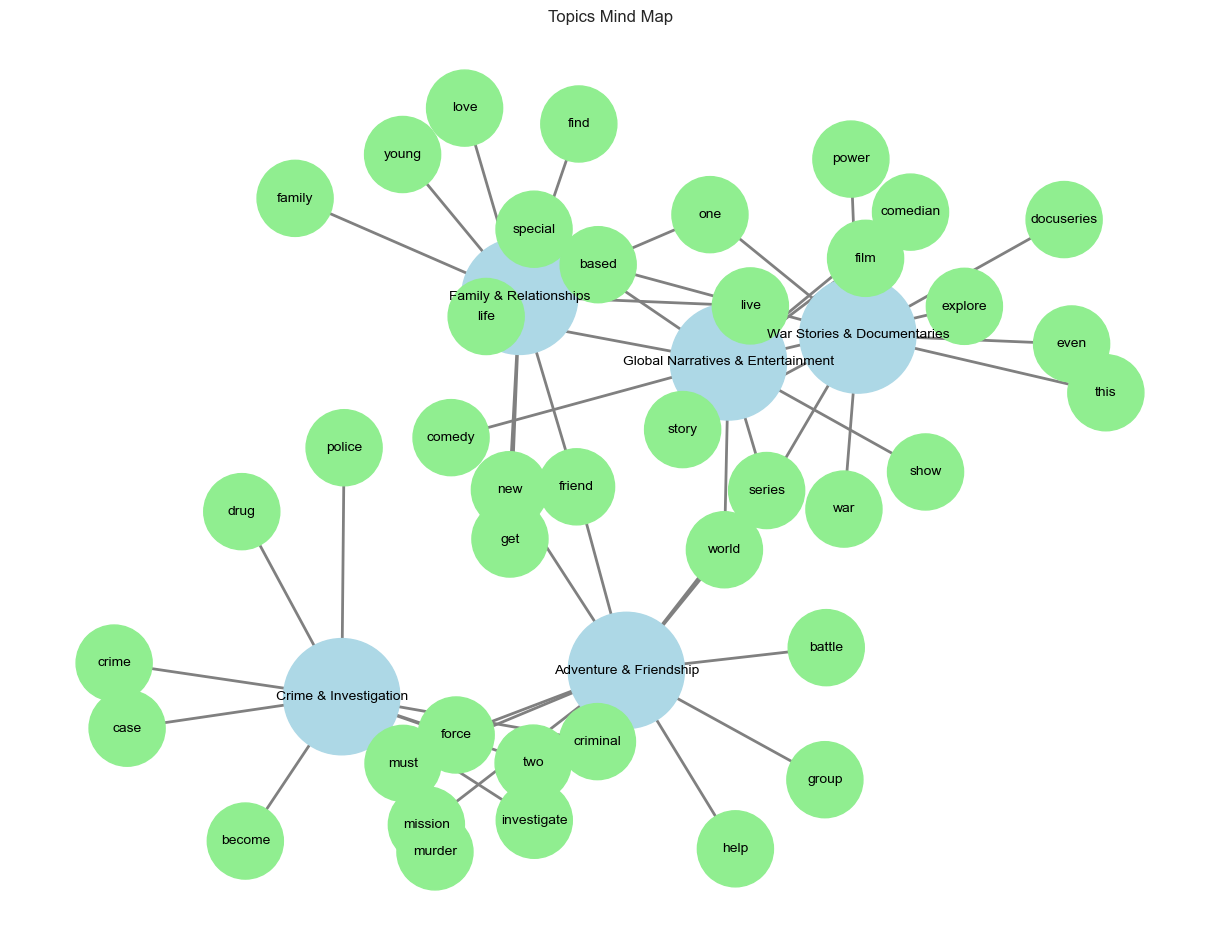

In [34]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_mind_map(topics, topic_words):
    # Create a new graph
    G = nx.Graph()

    # Add nodes for each topic
    for topic in topics:
        G.add_node(topic)

    # Add nodes and edges for each word associated with a topic
    for topic, words in topic_words.items():
        for word in words:
            G.add_node(word)
            G.add_edge(topic, word)

    # Assign colors and sizes to nodes based on whether they are topics or words
    color_map = ['lightblue' if node in topics else 'lightgreen' for node in G]
    size_map = [7000 if node in topics else 3000 for node in G]

    # Determine the position of each node using the spring layout algorithm
    pos = nx.spring_layout(G, k=0.5, iterations=50)

    # Draw the graph
    plt.figure(figsize=(12, 9))
    nx.draw(G, pos, with_labels=True, node_size=size_map, node_color=color_map, font_size=10, width=2, edge_color="gray")

    # Set the title of the plot
    plt.title("Topics Mind Map")
    
    # Display the plot
    plt.show()

# Now call the function with your topics and topic_words data
plot_mind_map(topics, topic_words)

# END